In [1]:
import pandas as pd
import numpy as np
#display audio files as image
import librosa
import librosa.display
import glob
# working with audio files
import IPython.display as ipd


In [2]:
pwd

'C:\\Users\\Utkarsh\\Desktop\\ML-workspace'

In [3]:
df = pd.read_csv('Train_data/train.csv')
df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [4]:
ipd.Audio('Train_data/train/2000.wav')

In [5]:
import os
os.chdir('C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\Train_data')

In [6]:
data, sampling_rate = librosa.load('train/1.wav')

In [7]:
# freq values
data

array([-0.09316426, -0.14310585,  0.0525441 , ..., -0.01574722,
       -0.00981222,  0.09794901], dtype=float32)

In [8]:
# for each second we have 22050 samples
sampling_rate

22050

In [9]:
# Audio sampling is the process of transforming a musical source into a digital file

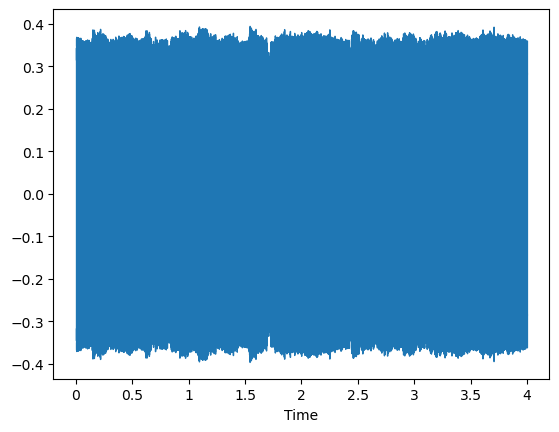

In [10]:
librosa.display.waveshow(data,sr = sampling_rate)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'siren'),
  Text(1, 0, 'street_music'),
  Text(2, 0, 'drilling'),
  Text(3, 0, 'dog_bark'),
  Text(4, 0, 'children_playing'),
  Text(5, 0, 'gun_shot'),
  Text(6, 0, 'engine_idling'),
  Text(7, 0, 'air_conditioner'),
  Text(8, 0, 'jackhammer'),
  Text(9, 0, 'car_horn')])

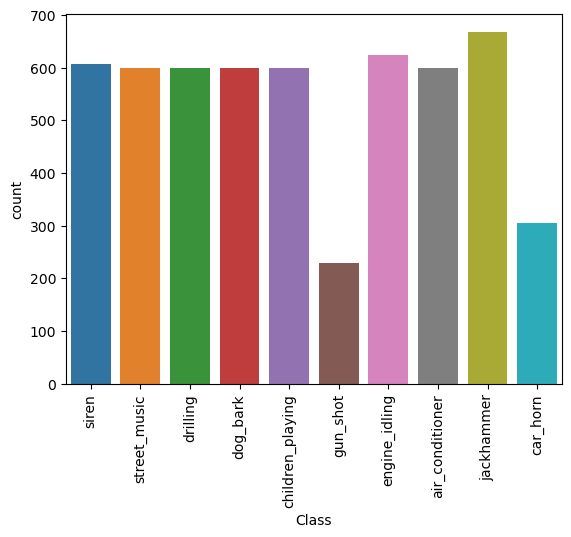

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = df['Class'],data = df)
plt.xticks( rotation='vertical')

In [12]:
# converting audio as sample
def parser(row):
    file_name = os.path.join('train/'+ str(row.ID)+ '.wav')
    # load audio file
    x, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    #extract features from data
    mfccs = np.mean(librosa.feature.mfcc(y = x, sr = sample_rate, n_mfcc = 40).T, axis = 0)
    feature = mfccs
    label = row.Class
    return [feature,label]

In [13]:
data = df.apply(parser, axis = 1)
data.columns = ['feature', 'label']

D:\ANACONDA\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
D:\ANACONDA\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
D:\ANACONDA\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [14]:
data.head()

0    [[-81.38705, 138.07051, -41.044647, 23.520897,...
1    [[-15.182259, 122.926346, -28.249317, 38.38614...
2    [[-123.35451, 14.803846, -49.69089, 6.908825, ...
3    [[-213.25885, 88.5533, -54.711796, 12.049843, ...
4    [[-237.34935, 135.40514, 39.687626, 20.682573,...
dtype: object

In [15]:
# input features
X = np.array(list(zip(*data))[0])
# output
y = np.array(list(zip(*data))[1])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))

In [18]:
y_test = to_categorical(le.transform(y_test))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

n = 10
model = Sequential()
model.add(Dense(256, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(n))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [20]:
model.fit(X_train, y_train, epochs = 90, batch_size = 50, validation_data = (X_test, y_test))


Epoch 1/90
87/87 [==============================] - 3s 15ms/step - loss: 5.8660 - accuracy: 0.1849 - val_loss: 2.1708 - val_accuracy: 0.1886
Epoch 2/90
87/87 [==============================] - 1s 11ms/step - loss: 2.1574 - accuracy: 0.2472 - val_loss: 1.8964 - val_accuracy: 0.3413
Epoch 3/90
87/87 [==============================] - 1s 11ms/step - loss: 1.9784 - accuracy: 0.2898 - val_loss: 1.7281 - val_accuracy: 0.4011
Epoch 4/90
87/87 [==============================] - 1s 11ms/step - loss: 1.8226 - accuracy: 0.3450 - val_loss: 1.5651 - val_accuracy: 0.4683
Epoch 5/90
87/87 [==============================] - 1s 11ms/step - loss: 1.6879 - accuracy: 0.4006 - val_loss: 1.3937 - val_accuracy: 0.5161
Epoch 6/90
87/87 [==============================] - 1s 12ms/step - loss: 1.5524 - accuracy: 0.4434 - val_loss: 1.2892 - val_accuracy: 0.5713
Epoch 7/90
87/87 [==============================] - 1s 12ms/step - loss: 1.4461 - accuracy: 0.4759 - val_loss: 1.2006 - val_accuracy: 0.5934
Epoch 8/90
87

Epoch 59/90
87/87 [==============================] - 1s 12ms/step - loss: 0.2370 - accuracy: 0.9209 - val_loss: 0.3062 - val_accuracy: 0.9209
Epoch 60/90
87/87 [==============================] - 1s 12ms/step - loss: 0.1941 - accuracy: 0.9322 - val_loss: 0.3114 - val_accuracy: 0.9200
Epoch 61/90
87/87 [==============================] - 1s 12ms/step - loss: 0.2133 - accuracy: 0.9236 - val_loss: 0.3255 - val_accuracy: 0.9190
Epoch 62/90
87/87 [==============================] - 1s 11ms/step - loss: 0.2180 - accuracy: 0.9280 - val_loss: 0.2622 - val_accuracy: 0.9200
Epoch 63/90
87/87 [==============================] - 1s 11ms/step - loss: 0.2007 - accuracy: 0.9303 - val_loss: 0.2987 - val_accuracy: 0.9218
Epoch 64/90
87/87 [==============================] - 1s 12ms/step - loss: 0.2085 - accuracy: 0.9296 - val_loss: 0.2691 - val_accuracy: 0.9218
Epoch 65/90
87/87 [==============================] - 1s 11ms/step - loss: 0.1975 - accuracy: 0.9342 - val_loss: 0.3128 - val_accuracy: 0.9154
Epoch 

In [21]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
score

34/34 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.9319


[0.289695680141449, 0.9319227337837219]

loss value of approximately 0.0.289 indicates how well the model is minimizing its prediction error.
metric value of approximately 0.933 represents the performance of the model according to the chosen evaluation metric.